The method I use is just reading in a simple CSV file. This dataset is in pretty good shape so besides naming columns there was not too much cleaning and organizing that I needed to do.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

I uploaded this dataset into my github in case you need to use it to run the code. I wasn't sure how you would want to deal with that since it is uploading from my computer. 

In [2]:
names = ['Serial_No', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance_of_Admit']
Admission_df = pd.read_csv("C:\\Users\Mason\Desktop\Add.csv" , header=None, names=names)

Here I am just looking at some basic statistical data.

In [3]:
Admission_df.head(5)

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
Admission_df.describe()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Here is a cross tab table looking at how there is more research done at higher ranking universities. As the rating of the university goes up there is a higer number of universites doing research as compared to not.  

In [5]:
pd.crosstab(Admission_df['Research'], Admission_df.University_Rating)

University_Rating,1,2,3,4,5
Research,,,,,
0,21,75,62,15,8
1,5,32,71,59,52


In [6]:
Admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial_No            400 non-null int64
GRE_Score            400 non-null int64
TOEFL_Score          400 non-null int64
University_Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance_of_Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
%matplotlib inline

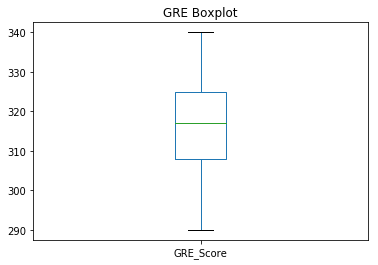

In [8]:
bbox = Admission_df['GRE_Score'].plot(kind="box", title='GRE Boxplot')

In [9]:
std_GRE_Score = Admission_df['GRE_Score'].std()
std_GRE_Score

11.473646113500477

In [10]:
max_outlier_GRE_Score_value = Admission_df['GRE_Score'].mean() + (std_GRE_Score * 3)
max_outlier_GRE_Score_value

351.22843834050144

In [11]:
min_outlier_GRE_Score_value = Admission_df['GRE_Score'].mean() - (std_GRE_Score * 3)
min_outlier_GRE_Score_value

282.38656165949857

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

This plot is both a scatter plot and draws a line of regression between GRE Score and Chance of admission. As one would expect they are positively correlated. We also see here that the data does not have any outliers that would appear out of the ordinary for the data. There are a few people who did well on the GRE but have a very low chance of being admitted, however, there are many other variables that could be at play here to help explain this. 

Text(0.5,0.98,'GRE Score and Chance of Admit')

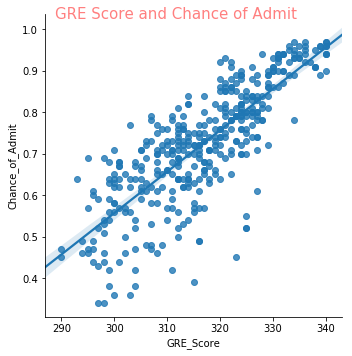

In [13]:
scatter=sns.lmplot(x="GRE_Score", y="Chance_of_Admit", data=Admission_df)
fig=scatter.fig
fig.suptitle('GRE Score and Chance of Admit', fontsize=15, color="r", alpha=0.5)

For this type of import method I am using some json data. I found this dataset online and am just reading it straight in. Next I change it into a pandas dataframe and then use a joint plot to look at how petal length and width compare. It's a pretty cool little plot. 

In [14]:
import json

In [15]:
json_string = [
  {"sepalLength": 5.1, "sepalWidth": 3.5, "petalLength": 1.4, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 4.9, "sepalWidth": 3.0, "petalLength": 1.4, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 4.7, "sepalWidth": 3.2, "petalLength": 1.3, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 4.6, "sepalWidth": 3.1, "petalLength": 1.5, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 5.0, "sepalWidth": 3.6, "petalLength": 1.4, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 5.4, "sepalWidth": 3.9, "petalLength": 1.7, "petalWidth": 0.4, "species": "setosa"},
  {"sepalLength": 4.6, "sepalWidth": 3.4, "petalLength": 1.4, "petalWidth": 0.3, "species": "setosa"},
  {"sepalLength": 5.0, "sepalWidth": 3.4, "petalLength": 1.5, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 4.4, "sepalWidth": 2.9, "petalLength": 1.4, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 4.9, "sepalWidth": 3.1, "petalLength": 1.5, "petalWidth": 0.1, "species": "setosa"},
  {"sepalLength": 5.4, "sepalWidth": 3.7, "petalLength": 1.5, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 4.8, "sepalWidth": 3.4, "petalLength": 1.6, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 4.8, "sepalWidth": 3.0, "petalLength": 1.4, "petalWidth": 0.1, "species": "setosa"},
  {"sepalLength": 4.3, "sepalWidth": 3.0, "petalLength": 1.1, "petalWidth": 0.1, "species": "setosa"},
  {"sepalLength": 5.8, "sepalWidth": 4.0, "petalLength": 1.2, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 5.7, "sepalWidth": 4.4, "petalLength": 1.5, "petalWidth": 0.4, "species": "setosa"},
  {"sepalLength": 5.4, "sepalWidth": 3.9, "petalLength": 1.3, "petalWidth": 0.4, "species": "setosa"},
  {"sepalLength": 5.1, "sepalWidth": 3.5, "petalLength": 1.4, "petalWidth": 0.3, "species": "setosa"},
  {"sepalLength": 5.7, "sepalWidth": 3.8, "petalLength": 1.7, "petalWidth": 0.3, "species": "setosa"},
  {"sepalLength": 5.1, "sepalWidth": 3.8, "petalLength": 1.5, "petalWidth": 0.3, "species": "setosa"},
  {"sepalLength": 5.4, "sepalWidth": 3.4, "petalLength": 1.7, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 5.1, "sepalWidth": 3.7, "petalLength": 1.5, "petalWidth": 0.4, "species": "setosa"},
  {"sepalLength": 4.6, "sepalWidth": 3.6, "petalLength": 1.0, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 5.1, "sepalWidth": 3.3, "petalLength": 1.7, "petalWidth": 0.5, "species": "setosa"},
  {"sepalLength": 4.8, "sepalWidth": 3.4, "petalLength": 1.9, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 5.0, "sepalWidth": 3.0, "petalLength": 1.6, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 5.0, "sepalWidth": 3.4, "petalLength": 1.6, "petalWidth": 0.4, "species": "setosa"},
  {"sepalLength": 5.2, "sepalWidth": 3.5, "petalLength": 1.5, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 5.2, "sepalWidth": 3.4, "petalLength": 1.4, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 4.7, "sepalWidth": 3.2, "petalLength": 1.6, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 4.8, "sepalWidth": 3.1, "petalLength": 1.6, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 5.4, "sepalWidth": 3.4, "petalLength": 1.5, "petalWidth": 0.4, "species": "setosa"},
  {"sepalLength": 5.2, "sepalWidth": 4.1, "petalLength": 1.5, "petalWidth": 0.1, "species": "setosa"},
  {"sepalLength": 5.5, "sepalWidth": 4.2, "petalLength": 1.4, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 4.9, "sepalWidth": 3.1, "petalLength": 1.5, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 5.0, "sepalWidth": 3.2, "petalLength": 1.2, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 5.5, "sepalWidth": 3.5, "petalLength": 1.3, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 4.9, "sepalWidth": 3.6, "petalLength": 1.4, "petalWidth": 0.1, "species": "setosa"},
  {"sepalLength": 4.4, "sepalWidth": 3.0, "petalLength": 1.3, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 5.1, "sepalWidth": 3.4, "petalLength": 1.5, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 5.0, "sepalWidth": 3.5, "petalLength": 1.3, "petalWidth": 0.3, "species": "setosa"},
  {"sepalLength": 4.5, "sepalWidth": 2.3, "petalLength": 1.3, "petalWidth": 0.3, "species": "setosa"},
  {"sepalLength": 4.4, "sepalWidth": 3.2, "petalLength": 1.3, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 5.0, "sepalWidth": 3.5, "petalLength": 1.6, "petalWidth": 0.6, "species": "setosa"},
  {"sepalLength": 5.1, "sepalWidth": 3.8, "petalLength": 1.9, "petalWidth": 0.4, "species": "setosa"},
  {"sepalLength": 4.8, "sepalWidth": 3.0, "petalLength": 1.4, "petalWidth": 0.3, "species": "setosa"},
  {"sepalLength": 5.1, "sepalWidth": 3.8, "petalLength": 1.6, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 4.6, "sepalWidth": 3.2, "petalLength": 1.4, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 5.3, "sepalWidth": 3.7, "petalLength": 1.5, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 5.0, "sepalWidth": 3.3, "petalLength": 1.4, "petalWidth": 0.2, "species": "setosa"},
  {"sepalLength": 7.0, "sepalWidth": 3.2, "petalLength": 4.7, "petalWidth": 1.4, "species": "versicolor"},
  {"sepalLength": 6.4, "sepalWidth": 3.2, "petalLength": 4.5, "petalWidth": 1.5, "species": "versicolor"},
  {"sepalLength": 6.9, "sepalWidth": 3.1, "petalLength": 4.9, "petalWidth": 1.5, "species": "versicolor"},
  {"sepalLength": 5.5, "sepalWidth": 2.3, "petalLength": 4.0, "petalWidth": 1.3, "species": "versicolor"},
  {"sepalLength": 6.5, "sepalWidth": 2.8, "petalLength": 4.6, "petalWidth": 1.5, "species": "versicolor"},
  {"sepalLength": 5.7, "sepalWidth": 2.8, "petalLength": 4.5, "petalWidth": 1.3, "species": "versicolor"},
  {"sepalLength": 6.3, "sepalWidth": 3.3, "petalLength": 4.7, "petalWidth": 1.6, "species": "versicolor"},
  {"sepalLength": 4.9, "sepalWidth": 2.4, "petalLength": 3.3, "petalWidth": 1.0, "species": "versicolor"},
  {"sepalLength": 6.6, "sepalWidth": 2.9, "petalLength": 4.6, "petalWidth": 1.3, "species": "versicolor"},
  {"sepalLength": 5.2, "sepalWidth": 2.7, "petalLength": 3.9, "petalWidth": 1.4, "species": "versicolor"},
  {"sepalLength": 5.0, "sepalWidth": 2.0, "petalLength": 3.5, "petalWidth": 1.0, "species": "versicolor"},
  {"sepalLength": 5.9, "sepalWidth": 3.0, "petalLength": 4.2, "petalWidth": 1.5, "species": "versicolor"},
  {"sepalLength": 6.0, "sepalWidth": 2.2, "petalLength": 4.0, "petalWidth": 1.0, "species": "versicolor"},
  {"sepalLength": 6.1, "sepalWidth": 2.9, "petalLength": 4.7, "petalWidth": 1.4, "species": "versicolor"},
  {"sepalLength": 5.6, "sepalWidth": 2.9, "petalLength": 3.6, "petalWidth": 1.3, "species": "versicolor"},
  {"sepalLength": 6.7, "sepalWidth": 3.1, "petalLength": 4.4, "petalWidth": 1.4, "species": "versicolor"},
  {"sepalLength": 5.6, "sepalWidth": 3.0, "petalLength": 4.5, "petalWidth": 1.5, "species": "versicolor"},
  {"sepalLength": 5.8, "sepalWidth": 2.7, "petalLength": 4.1, "petalWidth": 1.0, "species": "versicolor"},
  {"sepalLength": 6.2, "sepalWidth": 2.2, "petalLength": 4.5, "petalWidth": 1.5, "species": "versicolor"},
  {"sepalLength": 5.6, "sepalWidth": 2.5, "petalLength": 3.9, "petalWidth": 1.1, "species": "versicolor"},
  {"sepalLength": 5.9, "sepalWidth": 3.2, "petalLength": 4.8, "petalWidth": 1.8, "species": "versicolor"},
  {"sepalLength": 6.1, "sepalWidth": 2.8, "petalLength": 4.0, "petalWidth": 1.3, "species": "versicolor"},
  {"sepalLength": 6.3, "sepalWidth": 2.5, "petalLength": 4.9, "petalWidth": 1.5, "species": "versicolor"},
  {"sepalLength": 6.1, "sepalWidth": 2.8, "petalLength": 4.7, "petalWidth": 1.2, "species": "versicolor"},
  {"sepalLength": 6.4, "sepalWidth": 2.9, "petalLength": 4.3, "petalWidth": 1.3, "species": "versicolor"},
  {"sepalLength": 6.6, "sepalWidth": 3.0, "petalLength": 4.4, "petalWidth": 1.4, "species": "versicolor"},
  {"sepalLength": 6.8, "sepalWidth": 2.8, "petalLength": 4.8, "petalWidth": 1.4, "species": "versicolor"},
  {"sepalLength": 6.7, "sepalWidth": 3.0, "petalLength": 5.0, "petalWidth": 1.7, "species": "versicolor"},
  {"sepalLength": 6.0, "sepalWidth": 2.9, "petalLength": 4.5, "petalWidth": 1.5, "species": "versicolor"},
  {"sepalLength": 5.7, "sepalWidth": 2.6, "petalLength": 3.5, "petalWidth": 1.0, "species": "versicolor"},
  {"sepalLength": 5.5, "sepalWidth": 2.4, "petalLength": 3.8, "petalWidth": 1.1, "species": "versicolor"},
  {"sepalLength": 5.5, "sepalWidth": 2.4, "petalLength": 3.7, "petalWidth": 1.0, "species": "versicolor"},
  {"sepalLength": 5.8, "sepalWidth": 2.7, "petalLength": 3.9, "petalWidth": 1.2, "species": "versicolor"},
  {"sepalLength": 6.0, "sepalWidth": 2.7, "petalLength": 5.1, "petalWidth": 1.6, "species": "versicolor"},
  {"sepalLength": 5.4, "sepalWidth": 3.0, "petalLength": 4.5, "petalWidth": 1.5, "species": "versicolor"},
  {"sepalLength": 6.0, "sepalWidth": 3.4, "petalLength": 4.5, "petalWidth": 1.6, "species": "versicolor"},
  {"sepalLength": 6.7, "sepalWidth": 3.1, "petalLength": 4.7, "petalWidth": 1.5, "species": "versicolor"},
  {"sepalLength": 6.3, "sepalWidth": 2.3, "petalLength": 4.4, "petalWidth": 1.3, "species": "versicolor"},
  {"sepalLength": 5.6, "sepalWidth": 3.0, "petalLength": 4.1, "petalWidth": 1.3, "species": "versicolor"},
  {"sepalLength": 5.5, "sepalWidth": 2.5, "petalLength": 4.0, "petalWidth": 1.3, "species": "versicolor"},
  {"sepalLength": 5.5, "sepalWidth": 2.6, "petalLength": 4.4, "petalWidth": 1.2, "species": "versicolor"},
  {"sepalLength": 6.1, "sepalWidth": 3.0, "petalLength": 4.6, "petalWidth": 1.4, "species": "versicolor"},
  {"sepalLength": 5.8, "sepalWidth": 2.6, "petalLength": 4.0, "petalWidth": 1.2, "species": "versicolor"},
  {"sepalLength": 5.0, "sepalWidth": 2.3, "petalLength": 3.3, "petalWidth": 1.0, "species": "versicolor"},
  {"sepalLength": 5.6, "sepalWidth": 2.7, "petalLength": 4.2, "petalWidth": 1.3, "species": "versicolor"},
  {"sepalLength": 5.7, "sepalWidth": 3.0, "petalLength": 4.2, "petalWidth": 1.2, "species": "versicolor"},
  {"sepalLength": 5.7, "sepalWidth": 2.9, "petalLength": 4.2, "petalWidth": 1.3, "species": "versicolor"},
  {"sepalLength": 6.2, "sepalWidth": 2.9, "petalLength": 4.3, "petalWidth": 1.3, "species": "versicolor"},
  {"sepalLength": 5.1, "sepalWidth": 2.5, "petalLength": 3.0, "petalWidth": 1.1, "species": "versicolor"},
  {"sepalLength": 5.7, "sepalWidth": 2.8, "petalLength": 4.1, "petalWidth": 1.3, "species": "versicolor"},
  {"sepalLength": 6.3, "sepalWidth": 3.3, "petalLength": 6.0, "petalWidth": 2.5, "species": "virginica"},
  {"sepalLength": 5.8, "sepalWidth": 2.7, "petalLength": 5.1, "petalWidth": 1.9, "species": "virginica"},
  {"sepalLength": 7.1, "sepalWidth": 3.0, "petalLength": 5.9, "petalWidth": 2.1, "species": "virginica"},
  {"sepalLength": 6.3, "sepalWidth": 2.9, "petalLength": 5.6, "petalWidth": 1.8, "species": "virginica"},
  {"sepalLength": 6.5, "sepalWidth": 3.0, "petalLength": 5.8, "petalWidth": 2.2, "species": "virginica"},
  {"sepalLength": 7.6, "sepalWidth": 3.0, "petalLength": 6.6, "petalWidth": 2.1, "species": "virginica"},
  {"sepalLength": 4.9, "sepalWidth": 2.5, "petalLength": 4.5, "petalWidth": 1.7, "species": "virginica"},
  {"sepalLength": 7.3, "sepalWidth": 2.9, "petalLength": 6.3, "petalWidth": 1.8, "species": "virginica"},
  {"sepalLength": 6.7, "sepalWidth": 2.5, "petalLength": 5.8, "petalWidth": 1.8, "species": "virginica"},
  {"sepalLength": 7.2, "sepalWidth": 3.6, "petalLength": 6.1, "petalWidth": 2.5, "species": "virginica"},
  {"sepalLength": 6.5, "sepalWidth": 3.2, "petalLength": 5.1, "petalWidth": 2.0, "species": "virginica"},
  {"sepalLength": 6.4, "sepalWidth": 2.7, "petalLength": 5.3, "petalWidth": 1.9, "species": "virginica"},
  {"sepalLength": 6.8, "sepalWidth": 3.0, "petalLength": 5.5, "petalWidth": 2.1, "species": "virginica"},
  {"sepalLength": 5.7, "sepalWidth": 2.5, "petalLength": 5.0, "petalWidth": 2.0, "species": "virginica"},
  {"sepalLength": 5.8, "sepalWidth": 2.8, "petalLength": 5.1, "petalWidth": 2.4, "species": "virginica"},
  {"sepalLength": 6.4, "sepalWidth": 3.2, "petalLength": 5.3, "petalWidth": 2.3, "species": "virginica"},
  {"sepalLength": 6.5, "sepalWidth": 3.0, "petalLength": 5.5, "petalWidth": 1.8, "species": "virginica"},
  {"sepalLength": 7.7, "sepalWidth": 3.8, "petalLength": 6.7, "petalWidth": 2.2, "species": "virginica"},
  {"sepalLength": 7.7, "sepalWidth": 2.6, "petalLength": 6.9, "petalWidth": 2.3, "species": "virginica"},
  {"sepalLength": 6.0, "sepalWidth": 2.2, "petalLength": 5.0, "petalWidth": 1.5, "species": "virginica"},
  {"sepalLength": 6.9, "sepalWidth": 3.2, "petalLength": 5.7, "petalWidth": 2.3, "species": "virginica"},
  {"sepalLength": 5.6, "sepalWidth": 2.8, "petalLength": 4.9, "petalWidth": 2.0, "species": "virginica"},
  {"sepalLength": 7.7, "sepalWidth": 2.8, "petalLength": 6.7, "petalWidth": 2.0, "species": "virginica"},
  {"sepalLength": 6.3, "sepalWidth": 2.7, "petalLength": 4.9, "petalWidth": 1.8, "species": "virginica"},
  {"sepalLength": 6.7, "sepalWidth": 3.3, "petalLength": 5.7, "petalWidth": 2.1, "species": "virginica"},
  {"sepalLength": 7.2, "sepalWidth": 3.2, "petalLength": 6.0, "petalWidth": 1.8, "species": "virginica"},
  {"sepalLength": 6.2, "sepalWidth": 2.8, "petalLength": 4.8, "petalWidth": 1.8, "species": "virginica"},
  {"sepalLength": 6.1, "sepalWidth": 3.0, "petalLength": 4.9, "petalWidth": 1.8, "species": "virginica"},
  {"sepalLength": 6.4, "sepalWidth": 2.8, "petalLength": 5.6, "petalWidth": 2.1, "species": "virginica"},
  {"sepalLength": 7.2, "sepalWidth": 3.0, "petalLength": 5.8, "petalWidth": 1.6, "species": "virginica"},
  {"sepalLength": 7.4, "sepalWidth": 2.8, "petalLength": 6.1, "petalWidth": 1.9, "species": "virginica"},
  {"sepalLength": 7.9, "sepalWidth": 3.8, "petalLength": 6.4, "petalWidth": 2.0, "species": "virginica"},
  {"sepalLength": 6.4, "sepalWidth": 2.8, "petalLength": 5.6, "petalWidth": 2.2, "species": "virginica"},
  {"sepalLength": 6.3, "sepalWidth": 2.8, "petalLength": 5.1, "petalWidth": 1.5, "species": "virginica"},
  {"sepalLength": 6.1, "sepalWidth": 2.6, "petalLength": 5.6, "petalWidth": 1.4, "species": "virginica"},
  {"sepalLength": 7.7, "sepalWidth": 3.0, "petalLength": 6.1, "petalWidth": 2.3, "species": "virginica"},
  {"sepalLength": 6.3, "sepalWidth": 3.4, "petalLength": 5.6, "petalWidth": 2.4, "species": "virginica"},
  {"sepalLength": 6.4, "sepalWidth": 3.1, "petalLength": 5.5, "petalWidth": 1.8, "species": "virginica"},
  {"sepalLength": 6.0, "sepalWidth": 3.0, "petalLength": 4.8, "petalWidth": 1.8, "species": "virginica"},
  {"sepalLength": 6.9, "sepalWidth": 3.1, "petalLength": 5.4, "petalWidth": 2.1, "species": "virginica"},
  {"sepalLength": 6.7, "sepalWidth": 3.1, "petalLength": 5.6, "petalWidth": 2.4, "species": "virginica"},
  {"sepalLength": 6.9, "sepalWidth": 3.1, "petalLength": 5.1, "petalWidth": 2.3, "species": "virginica"},
  {"sepalLength": 5.8, "sepalWidth": 2.7, "petalLength": 5.1, "petalWidth": 1.9, "species": "virginica"},
  {"sepalLength": 6.8, "sepalWidth": 3.2, "petalLength": 5.9, "petalWidth": 2.3, "species": "virginica"},
  {"sepalLength": 6.7, "sepalWidth": 3.3, "petalLength": 5.7, "petalWidth": 2.5, "species": "virginica"},
  {"sepalLength": 6.7, "sepalWidth": 3.0, "petalLength": 5.2, "petalWidth": 2.3, "species": "virginica"},
  {"sepalLength": 6.3, "sepalWidth": 2.5, "petalLength": 5.0, "petalWidth": 1.9, "species": "virginica"},
  {"sepalLength": 6.5, "sepalWidth": 3.0, "petalLength": 5.2, "petalWidth": 2.0, "species": "virginica"},
  {"sepalLength": 6.2, "sepalWidth": 3.4, "petalLength": 5.4, "petalWidth": 2.3, "species": "virginica"},
  {"sepalLength": 5.9, "sepalWidth": 3.0, "petalLength": 5.1, "petalWidth": 1.8, "species": "virginica"}
]

In [16]:
flower_df=pd.DataFrame(json_string)
flower_df.head(5)

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


Here I add all values for flowers up as a way to see the total size of a flower by species. Next I rounded it to integer values and then made a cross tabs table in order to compare a rough idea of total size of a flower across species. 

In [17]:
total=flower_df['petalLength']+flower_df['petalWidth']+flower_df['sepalLength']+flower_df['sepalWidth']
totals=round(total)
pd.crosstab(totals, flower_df.species)

species,setosa,versicolor,virginica
row_0,,,
8.0,2,0,0
9.0,8,0,0
10.0,23,0,0
11.0,15,0,0
12.0,2,4,0
13.0,0,9,0
14.0,0,14,1
15.0,0,13,3
16.0,0,10,12


In [18]:
flower_df.corr()

,petalLength,petalWidth,sepalLength,sepalWidth
petalLength,1.000000,0.962865,0.871754,-0.428440
petalWidth,0.962865,1.000000,0.817941,-0.366126
sepalLength,0.871754,0.817941,1.000000,-0.117570
sepalWidth,-0.428440,-0.366126,-0.117570,1.000000


In [19]:
print(flower_df.max())
print(flower_df.min())

petalLength          6.9
petalWidth           2.5
sepalLength          7.9
sepalWidth           4.4
species        virginica
dtype: object
petalLength         1
petalWidth        0.1
sepalLength       4.3
sepalWidth          2
species        setosa
dtype: object


While there are some outliers in this data as we can see comparing percentiles to the min/max values found above. The values do not seem out of the relm of possibilities for flowers so they seem like they fit in the data. 

In [20]:
flower_df.describe(percentiles=[.01,.05,.95,.99])

,petalLength,petalWidth,sepalLength,sepalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,3.758000,1.199333,5.843333,3.057333
std,1.765298,0.762238,0.828066,0.435866
min,1.000000,0.100000,4.300000,2.000000
1%,1.149000,0.100000,4.400000,2.200000
5%,1.300000,0.200000,4.600000,2.345000
50%,4.350000,1.300000,5.800000,3.000000
95%,6.100000,2.300000,7.255000,3.800000
99%,6.700000,2.500000,7.700000,4.151000
max,6.900000,2.500000,7.900000,4.400000


Text(0.5,0.98,'Petal Width and Length in CM')

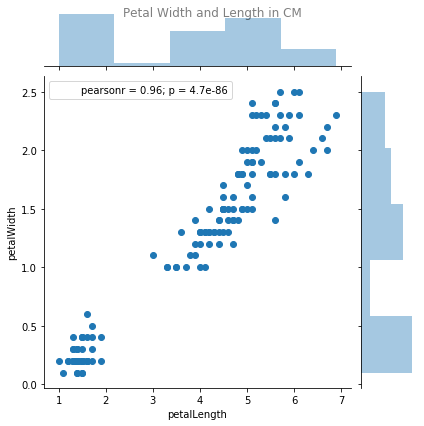

In [21]:
joint=sns.jointplot(flower_df.petalLength, flower_df.petalWidth, kind="scatter")
fig=joint.fig
fig.suptitle('Petal Width and Length in CM', fontsize=12, color="black", alpha=0.5)

Here I am importing some things that will allow me to pull in the html from a website and parse it to get the data I want from it. 

In [22]:
from bs4 import BeautifulSoup
import requests

Here I am running through the html and only pulling out the country names. I remove xx from the list of country ID's because it is not linked to any country, it is just a filler in the html code for where coutry abbreviations will go in the future and I just picked it up. I drop FK because the coutry data that it is attached to has only the numbers and not the years which threw my code into error messages. There is undoubtably a work around, but after playing with it for awhile I could not get it to work so I just drop it. It's just a typo on the website which was random and because it is only one country out of over a hundred I decided it would be fine to just drop it. 

In [23]:
site_text = requests.get('https://www.cia.gov/library/publications/the-world-factbook/fields/355.html#AF').text
soup = BeautifulSoup(site_text, 'html.parser')
code = soup.find("select", id='search-place')
Y= str(code).split("\"")
id_list=list()
for i in Y:
    if len(i)== 2:
        id_list.append(i.swapcase())
id_list.remove('XX')
id_list.remove('FK')



Here I am pulling the same html into the notebook and this time instead of pulling out the coutry ID I am pulling out the data for life expectency relating to total population, male population, and female population by coutry. Each set of data is saved in it's own list along with a no data. I am using the id list that we created above as the list that each loop works through to then find the data. If there is no data to be found then it dumps it into the no data list. This is because there are some countries that they just have no data on life expectency on. In the loops I have it looking for the label "total pop" or "male" or "female" and then have it go to the next item it pulls because that is the data we are iterested in and then I have it split the number away from the word "years" and just keep the number. It takes some time to run. 

In [24]:
totalPop = list()
nodata=list()
malePop = list()
femalePop = list()
for i in id_list:
    
    site_text = requests.get('https://www.cia.gov/library/publications/the-world-factbook/fields/355.html#AF').text
    soup = BeautifulSoup(site_text, 'html.parser')
    life_expectency = soup.find("tr", id= i)
    if str(life_expectency) == "None":
        nodata.append(i)
        continue
    Country_data = [span.text for span in life_expectency.find_all('span')]
    indexPop = -1
    for l in range(len(Country_data)):
        if Country_data[l] == 'total population:':
            indexPop = l + 1  
    if Country_data[indexPop] == 'NA':
        nodata.append(i)
        continue
    temp, garbage = Country_data[indexPop].split(' ')
    temp = float(temp)
    totalPop.append(temp)
    for j in range(len(Country_data)):
        if Country_data[j] == 'male:':
            indexPop = j + 1  
    if Country_data[indexPop] == 'NA':
        nodata.append(i)
        continue
    tempMale, garbage = Country_data[indexPop].split(' ')
    tempMale = float(tempMale)
    malePop.append(tempMale)
    for k in range(len(Country_data)):
        if Country_data[k] == 'female:':
            indexPop = k + 1  
    if Country_data[indexPop] == 'NA':
        nodata.append(i)
        continue
    tempFemale, garbage = Country_data[indexPop].split(' ')
    tempFemale = float(tempFemale)
    femalePop.append(tempFemale)
   

Here I am just turning the lists that we found above into dataframes so that I can look at statistical information and plot them using pandas.

In [25]:
totalPop_df=pd.DataFrame(data=totalPop, columns=['total pop'])
malePop_df=pd.DataFrame(data=malePop, columns=['male'])
femalePop_df=pd.DataFrame(data=femalePop, columns=['female'])
id_list_df=pd.DataFrame(id_list, columns=['country id'])
total_life_df= [totalPop_df, malePop_df, femalePop_df, id_list_df]

Here I am using the concat function to bring the four into one nice table. Following I am just looking at more of the same statistical insights as before and then am ploting male and female life expectency on a scatterplot with a line of regression just to get a feel for how close the the two life expectencies are over all the countries. 

In [26]:
title= ['country id', 'total pop', 'male', 'female']
results=pd.concat([id_list_df, totalPop_df, malePop_df, femalePop_df], names=title, axis=1, join='inner')

As this data is aggregated over whole countries to begin with we would not expect to see any crazy outliers. As seen below we don't. It is within reason that there could be a countries with very low averages and others with high. In this case Monaco is the country with the highest average and Afghanistan with the lowest which both seem to check out logically. 

In [27]:
results.describe()

,total pop,male,female
count,224.000000,224.000000,224.000000
mean,73.329911,70.847768,75.931696
std,7.638823,7.398291,8.013118
min,52.100000,50.600000,53.100000
25%,68.400000,65.825000,70.475000
50%,75.200000,72.600000,78.050000
75%,78.900000,76.375000,81.900000
max,89.400000,85.500000,93.400000


In [28]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 4 columns):
country id    224 non-null object
total pop     224 non-null float64
male          224 non-null float64
female        224 non-null float64
dtypes: float64(3), object(1)
memory usage: 7.1+ KB


Text(0.5,0.98,'Life Expectency by Gender in Years')

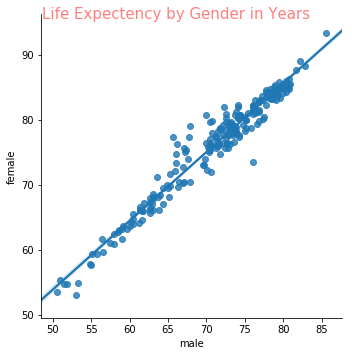

In [29]:
plot=sns.lmplot(x="male", y="female", data=results)
fig=plot.fig
fig.suptitle('Life Expectency by Gender in Years', fontsize=15, color="r", alpha=0.5)

In [30]:
results.corr()

,total pop,male,female
total pop,1.000000,0.993633,0.994180
male,0.993633,1.000000,0.975826
female,0.994180,0.975826,1.000000


This plot makes visualizing the life expectency between males and females really easy. Clearly women have a slight advantage when it comes to life expectency. 

Text(0.5,1,'Life Expectency by Gender')

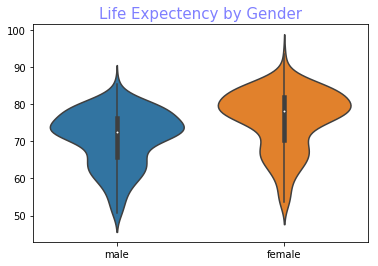

In [31]:
mean=sns.violinplot(data=results[['male', 'female']], orient="v")
mean.set_title('Life Expectency by Gender', fontsize=15, color="b", alpha=0.5)

Here I am using an api for the federal reserves economic data to pull in data for CPI and Unemployment. I then convert the data into dataframes and use concat to merge the two together so that I can then plot it. I really don't have a purpose in picking these two specific series so I don't think there is much of a conclusion to make from the graph other then maybe there is a slight correlation between higher CPI and Unemployment rate, but there are probably other reasons for this data to be like this too. A benefit of the concat function here is that it aligns our data so that it is starting in the same year. The data was already matching in that it is monthly data, but one of them started a year or two earlier before we used the concat function. 

In [32]:
from fredapi import Fred
fred=Fred(api_key="ed3bb3ae9c97bed408f032810281321c")
cpi=fred.get_series("CPIAUCSL")
cur=fred.get_series("UNRATE")
CPI=pd.DataFrame(cpi)
CUR=pd.DataFrame(cur)
df=pd.concat([CPI, CUR], axis=1, join='inner')
df.columns= ['Consumer Price Index', 'Civilian Unemployment Rate']
df.head(5)

,Consumer Price Index,Civilian Unemployment Rate
1948-01-01,23.68,3.4
1948-02-01,23.67,3.8
1948-03-01,23.50,4.0
1948-04-01,23.82,3.9
1948-05-01,24.01,3.5


In [33]:
df.describe()

,Consumer Price Index,Civilian Unemployment Rate
count,852.000000,852.000000
mean,109.291915,5.763028
std,76.179413,1.638414
min,23.500000,2.500000
25%,31.642500,4.600000
50%,99.600000,5.600000
75%,176.175000,6.800000
max,252.876000,10.800000


The consumer price index tends to vary quite a bit and has several values that would appear to be significant outliers, however, this variablility is consistent with what we know about the consumer price index and the source of the data is very trustworthy so I am not worried about controling for outliers in this data. 

Text(0.5,0.98,'CPI vs. Unemployment Rate')

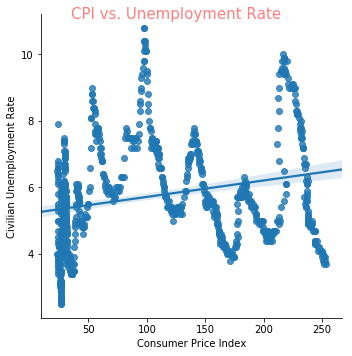

In [34]:
graph=sns.lmplot(x="Consumer Price Index", y="Civilian Unemployment Rate", data=df)
fig=graph.fig
fig.suptitle('CPI vs. Unemployment Rate', fontsize=15, color="r", alpha=0.5)

Here we see that in fact they are not highly correlated. 

In [35]:
df.corr()

,Consumer Price Index,Civilian Unemployment Rate
Consumer Price Index,1.000000,0.229743
Civilian Unemployment Rate,0.229743,1.000000
